<table>
 <tr align=left><td><img align=left src="https://i.creativecommons.org/l/by/4.0/88x31.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Marc Spiegelman, Template from Kyle Mandli</td>
</table>


# Mg2SiO4 Stixrude Equilibrium Phase diagram

This notebook will use functions from the ThermoCodegen generated Mg2SiO4 stixrude system to Find phase boundaries
And compare to those from ThermoEngine Objective C functions

In [17]:
# load the standard goodies
import numpy as np
from scipy.optimize import fsolve, brentq
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams['font.size'] = 16

### Load the ThermoCodegen object for the fo-fa reactive system

This will require that the python bindings for the py_fo_fa_binary module are in the python path

if you are using modules,  this can be accomplished by running
|
```bash
cd ../../reactions/Mg2SiO4_stixrude
module load ./Mg2SiO4.module


In [18]:
import py_Mg2SiO4_stixrude as pms
pms.phase_info()

{'Abbrev': ['Fa', 'Ol', 'Wa', 'FeWa', 'FeRi', 'Ri', 'MgRi', 'MgWa', 'Fo'],
 'ClassName': ['Fayalite',
  'Olivine',
  'Wadsleyite',
  'FeWadsleyite',
  'FeRingwoodite',
  'Ringwoodite',
  'MgRingwoodite',
  'MgWadsleyite',
  'Forsterite'],
 'PhaseType': ['pure',
  'solution',
  'solution',
  'pure',
  'pure',
  'solution',
  'pure',
  'pure',
  'pure']}

In [19]:
rxn = pms.Mg2SiO4_stixrude()
rxn.report()

Phase 0 Forsterite
     Endmember 0 Forsterite_stixrude
Phase 1 MgWadsleyite
     Endmember 0 MgWadsleyite_stixrude
Phase 2 MgRingwoodite
     Endmember 0 MgRingwoodite_stixrude


In [20]:
from thermoengine import model
te = model.Database(database='Stixrude')

utility functions 


In [21]:
toCelsius = lambda T: T - 273.15
toKelvin = lambda T: T + 273.15
toBar = lambda P: P*10000.

In [22]:
T = 2000.
P = toBar(15.)

In [23]:
Fo_te = te.get_phase('Fo')
Wa_te = te.get_phase('MgWds')
Ri_te = te.get_phase('MgRwd')

A_te = lambda T,P: np.array([ Fo_te.gibbs_energy(T,P) - Wa_te.gibbs_energy(T,P), Wa_te.gibbs_energy(T,P) - Ri_te.gibbs_energy(T,P)])

print(Fo_te.gibbs_energy(T,P))
print(Wa_te.gibbs_energy(T,P))
print(Ri_te.gibbs_energy(T,P))
print()
print(A_te(T,P))

-1887821.7017618383
-1888247.9911278826
-1882375.4171137628

[  426.28936604 -5872.57401412]


In [24]:
print(Fo_te.entropy(T,P))

381.5445217121282


In [8]:
Fo = pms.Forsterite()
Wa = pms.MgWadsleyite()
Ri = pms.MgRingwoodite()
c = [1.]

A_p = lambda T,P: np.array([ Fo.g(T,P,c) - Wa.g(T,P,c), Wa.g(T,P,c) - Ri.g(T,P,c)])
print(Fo.g(T,P,c))
print(Wa.g(T,P,c))
print(Ri.g(T,P,c))
print()
print(A_p(T,P))

-1887821.7017618371
-1888247.9911278812
-1882375.417113757

[  426.28936604 -5872.57401412]


In [31]:
print(T,P)
print(Fo.s(T,P,[1]))
print(Fo.Mass([1]))
print(Fo.s(T,P,[1])/Fo.Mass([1]))

2500.0 250000.0
413.3936556576755
140.6931
2.9382653140607147


compare affinities along a T,P trajectory first


In [9]:
P = np.linspace(1,25)
Pbar = toBar(P)
G_Fo_te = np.array([ Fo_te.gibbs_energy(T,p) for p in Pbar])
G_Fo =  np.array([ Fo.g(T,p,c) for p in Pbar])
G_Wa_te = np.array([ Wa_te.gibbs_energy(T,p) for p in Pbar])
G_Wa =  np.array([ Wa.g(T,p,c) for p in Pbar])
G_Ri_te = np.array([ Ri_te.gibbs_energy(T,p) for p in Pbar])
G_Ri =  np.array([ Ri.g(T,p,c) for p in Pbar])



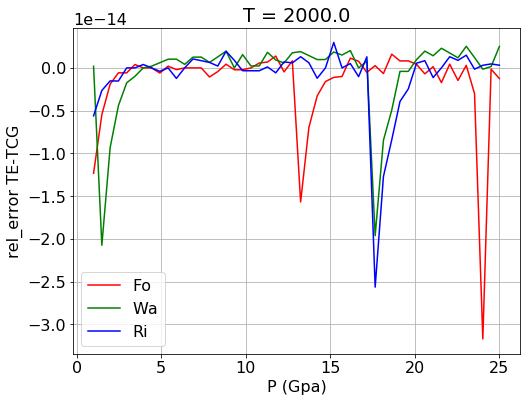

In [10]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.plot(P, (G_Fo_te - G_Fo)/(G_Fo_te) ,'r',label='Fo')
axes.plot(P, (G_Wa_te - G_Wa)/(G_Fo_te) ,'g',label='Wa')
axes.plot(P, (G_Ri_te - G_Ri)/(G_Fo_te) ,'b',label='Ri')
axes.legend(loc='best')
axes.set_xlabel('P (Gpa)')
axes.set_ylabel('rel_error TE-TCG')
axes.set_title('T = {}'.format(T))
axes.grid()
plt.show()

### Plot the Affinity Surfaces for the Fo-Wa reaction and Wa-Ri reaction

In [11]:
ta = np.linspace(1000.,2500.,100)
pa = np.linspace(.1,25.,100)
Tm,Pm = np.meshgrid(ta,pa)
A0 = np.zeros(Tm.shape)
A1 = np.zeros(Tm.shape)
A0_te = np.zeros(Tm.shape)
A1_te = np.zeros(Tm.shape)

C = rxn.zero_C()
for i in range(len(C)):
    C[i] = [1.]
for i,T in enumerate(ta):
    for j,P in enumerate(toBar(pa)):
        A = rxn.A(T,P,C)
        A0[j,i] = A[0]
        A1[j,i] = A[1]
        A0_te[j,i] = A_te(T,P)[0]
        A1_te[j,i] = A_te(T,P)[1]

## Phase Diagram

Contour 0 affinity for each reaction and compare to ThermoEngine

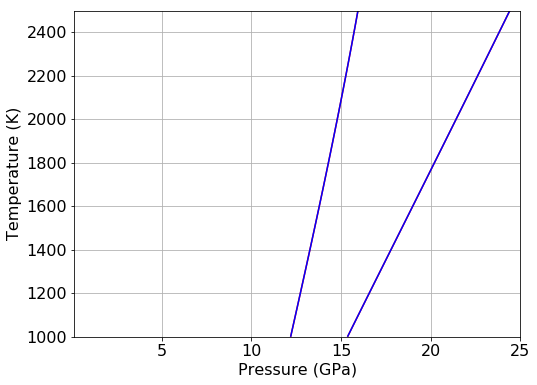

In [12]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.contour(Pm,Tm,A0,[0],colors = ['r'])
axes.contour(Pm,Tm,A1,[0],colors = ['r'])
axes.contour(Pm,Tm,A0_te,[0],colors = ['b'])
axes.contour(Pm,Tm,A1_te,[0],colors = ['b'])



axes.grid()
axes.set_xlabel('Pressure (GPa)')
axes.set_ylabel('Temperature (K)')
plt.show()

### Plot volume surfaces $V(T,P)$ for Stixrude pure phases

In [13]:

V_Fo = np.zeros(Tm.shape)
V_MgWa = np.zeros(Tm.shape)
V_MgRi = np.zeros(Tm.shape)

for i,T in enumerate(ta):
    for j,P in enumerate(toBar(pa)):
        V_Fo[j,i] = Fo.v(T,P,c)
        V_MgWa[j,i] = Wa.v(T,P,c)
        V_MgRi[j,i] = Ri.v(T,P,c)

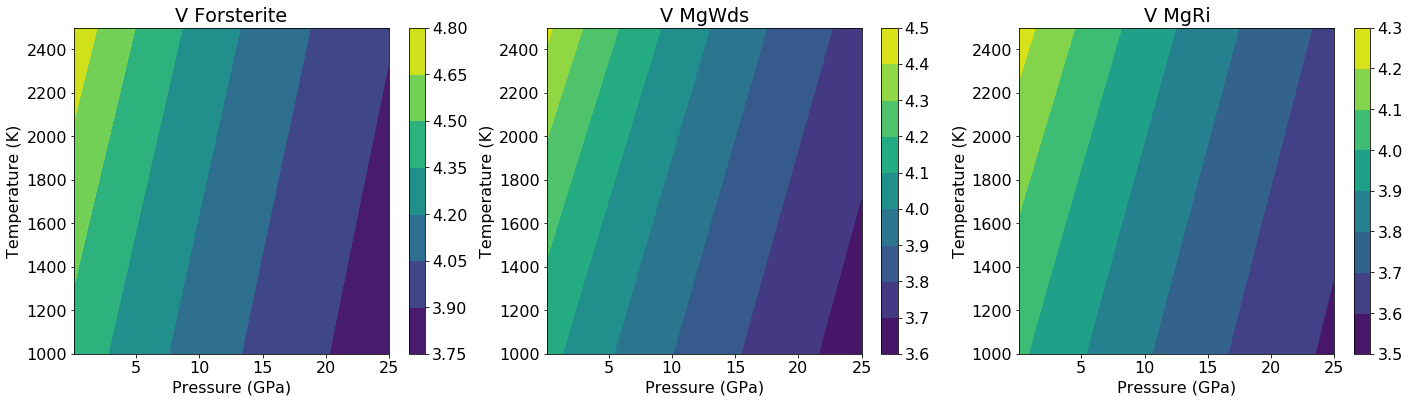

In [14]:
fig = plt.figure(figsize=(24,6))
axes = fig.add_subplot(1,3,1)
cf = axes.contourf(Pm,Tm,V_Fo )
plt.colorbar(cf)
axes.set_xlabel('Pressure (GPa)')
axes.set_ylabel('Temperature (K)')
axes.set_title('V Forsterite')

axes = fig.add_subplot(1,3,2)
cf = axes.contourf(Pm,Tm,V_MgWa )
plt.colorbar(cf)
axes.set_xlabel('Pressure (GPa)')
axes.set_ylabel('Temperature (K)')
axes.set_title('V MgWds')

axes = fig.add_subplot(1,3,3)
cf = axes.contourf(Pm,Tm,V_MgRi )
plt.colorbar(cf)
axes.set_xlabel('Pressure (GPa)')
axes.set_ylabel('Temperature (K)')
axes.set_title('V MgRi')

plt.show()